In [1]:
# File name: dataAnalysis.ipynb
# =============================================================
# ECS 260 Project, Fall 2021
# Team 16, Project 9
# Author: Lynden Lin
# =============================================================
# Description: 
# This file is used for the quantitative data analysis of the 
# project.
#

# 0. Libraries and features

In [2]:
import os
import json
import copy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import seaborn as sns
import statsmodels.api as sm
#import scipy as sc

# Customized hlp.py that contains helper functions
import hlp 

## List of features for projects and forks ##

proFeat  = ["total_fork_count",
            "watchers_count",
            "star_count",
            "open_issues_count",
            "size",
            "fork_count_within_time"]

forkFeat = ["watchers_count",
            "star_count",
            "branches_count",
            "total_commits_count",
            "commits_count_within_incubation",
            "total_no_of_times_files_modified",
            "total_no_of_lines_added",                
            "total_no_of_lines_deleted"]

            # code_churn = total_no_of_lines_added + total_no_of_lines_deleted
            # Feature creation, will be done later


# 0. Load JSON Data Files

In [3]:
## 0.1 Get dicts for ALL retired and ALL graduated raw data

# Assume the folder rawData that contains folders of retired and graduated projects in the same directory of 
# this .ipynb file
retiredPath = './rawData/retired/'
graduatedPath = './rawData/graduated/'

retiredAll = hlp.getDataAll(retiredPath)
graduatedAll = hlp.getDataAll(graduatedPath)
    
print("All retired projects count: " + str(len(list(retiredAll.keys()))) )
print("All graduated projects count: " + str(len(list(graduatedAll.keys()))) ) 
print()


## 0.2 Seperate "Features" and "Forks" on projects

# Retired ProjectToFeature Dict and Retired ProjectToFork Dict
rtProFeat, rtProFork = hlp.getFeatAndFork(proFeat, retiredAll)
# Graduated ProjectToFeature Dict and Graduated ProjectToFork Dict
grProFeat, grProFork = hlp.getFeatAndFork(proFeat, graduatedAll)

# print("Retired projects TO only projects features count: " + str(len(list(rtProFeat.keys()))) )
# print("Retired projects TO only forks count: " + str(len(list(rtProFork.keys()))) )
# print()

# print("Graduated projects TO only projects features count: " + str(len(list(grProFeat.keys()))) )
# print("Graduated projects TO only forks count: " + str(len(list(grProFork.keys()))) )
# print()


## 0.3 Aggregate each project's all forks based on its fork features
##     This excludes any project with fork_count_within_time == 0
##     Note: ONLY consider forks on GitHub
rtProForksFeat = hlp.getAggForks(rtProFork, forkFeat)
grProForksFeat = hlp.getAggForks(grProFork, forkFeat)

print("Retired projects that have forks within its corresponding incubation period count: " 
              + str(len(list(rtProForksFeat.keys()))) )
print("Graduated projects that have forks within its corresponding incubation period count: " 
              + str(len(list(grProForksFeat.keys()))) )
print()

print()
print("Projects with the incomplete collection, "
      + "i.e. no project features in the JSON data file, are excluded in the count above.")


32
135
All retired projects count: 32
All graduated projects count: 132

Retired projects that have forks within its corresponding incubation period count: 29
Graduated projects that have forks within its corresponding incubation period count: 52


Projects with the incomplete collection, i.e. no project features in the JSON data file, are excluded in the count above.


# Goal 
The goal of our project is to study the different project and forking features affecting the success and failure of projects under Apache Software Foundation Incubator. The project will help understand which of these features correlate with the success and failure of the project. Additionally, the project can identify the features that do not correlate to the projects’ sustainability.

# Research Questions
RQ1: Which project features and fork features could be stronger determinants of the success or failure of a project in ASFI having contributions in GitHub during the incubation period?\
RQ2: Is the relative work amount in terms of the number of commits in forks considerably different between graduated and retired projects of ASFI?\
RQ3: Does the size of commits and size of projects contribute to the success or failure of a project during its incubation period?\


# 1. Preliminary Data Analysis

Project Features:\
    "total_fork_count"\
    "watchers_count" (followers on GitHub) \
    "star_count"\
    "open_issues_count"\
    "size"\
    "fork_count_within_time"

Fork Features:\
    "watchers_count"\
    "star_count"\
    "branches_count"\
    "total_commits_count"\
    "commits_count_within_incubation"\
    "total_no_of_times_files_modified"\
    "total_no_of_lines_added"\
    "total_no_of_lines_deleted"
    
    
    Only consider the project with forks <= 3000
    

In [4]:
rtProFeatDF = pd.DataFrame.from_dict(rtProFeat, orient='index')
grProFeatDF = pd.DataFrame.from_dict(grProFeat, orient='index')

print("(number of retired projects, number of projects features): " + str(rtProFeatDF.shape) )
print("Statistics for retired projects with projects features: \n")
print(rtProFeatDF.describe())

#print(rtProFeatDF.sort_values("total_fork_count"))
#print(rtProFeatDF["total_fork_count"])
#print(rtProFeatDF[proFeat])

# rows and columns are transposed:
#rtProFeatDF.transpose()

(number of retired projects, number of projects features): (32, 6)
Statistics for retired projects with projects features: 

       total_fork_count  watchers_count    star_count  open_issues_count  \
count         32.000000       32.000000     32.000000          32.000000   
mean         125.656250       40.812500    543.500000           9.312500   
std          488.021721      123.365818   2624.195397          30.696682   
min            6.000000        6.000000      5.000000           0.000000   
25%           15.000000        9.500000     16.750000           1.000000   
50%           31.500000       19.000000     43.500000           2.000000   
75%           66.250000       22.250000    115.000000           4.250000   
max         2795.000000      714.000000  14917.000000         175.000000   

               size  fork_count_within_time  
count      32.00000               32.000000  
mean    47342.37500               38.750000  
std    101737.12867               77.662213  
min   

In [5]:
print("(number of graduated projects, number of projects features): " + str(grProFeatDF.shape) )
print("Statistics for graduated projects with projects features: \n")

print(grProFeatDF.describe())


(number of graduated projects, number of projects features): (132, 6)
Statistics for graduated projects with projects features: 

       total_fork_count  watchers_count   star_count  open_issues_count  \
count        132.000000      132.000000   132.000000         132.000000   
mean         375.613636       79.886364   799.462121          45.901515   
std          523.156737      129.229168  1298.968760         113.925773   
min            4.000000        5.000000     2.000000           0.000000   
25%           52.000000       19.000000    76.500000           2.000000   
50%          150.500000       37.500000   237.500000          10.000000   
75%          533.750000       90.750000   884.500000          37.500000   
max         2810.000000     1221.000000  6945.000000         787.000000   

               size  fork_count_within_time  
count  1.320000e+02              132.000000  
mean   1.644806e+05               17.681818  
std    5.984428e+05               42.153721  
min    3.3

(number of graduated projects, number of projects features): (132, 6)
Histograms for graduated projects on projects features: 



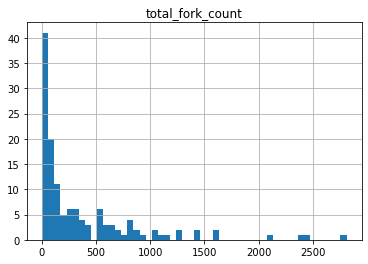

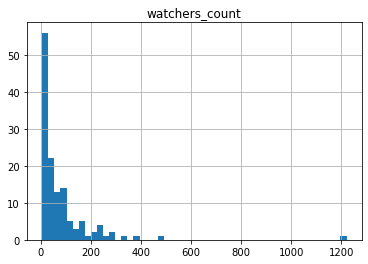

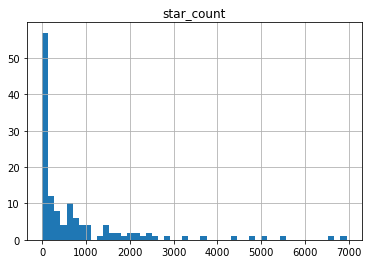

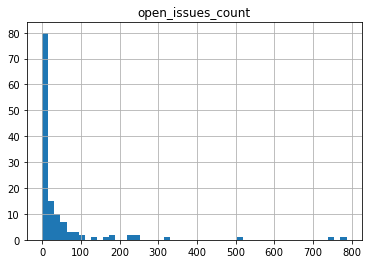

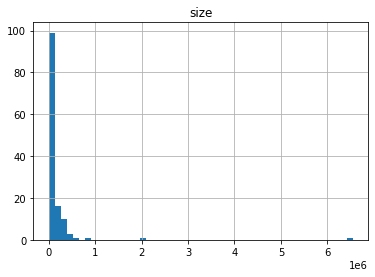

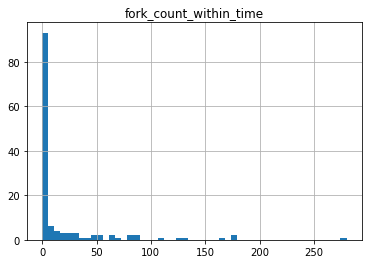

In [6]:
print("(number of graduated projects, number of projects features): " + str(grProFeatDF.shape) )
print("Histograms for graduated projects on projects features: \n")

for feat in proFeat:
    grProFeatDF.hist(column=feat, bins=50)


(number of retired projects, number of projects features): (32, 6)
Histograms for retired projects on projects features: 



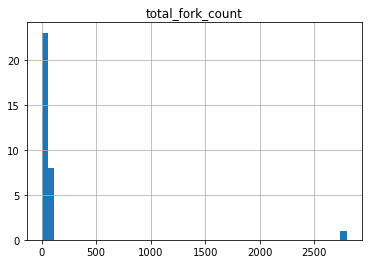

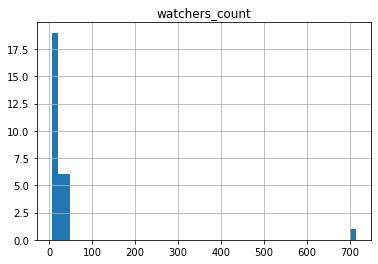

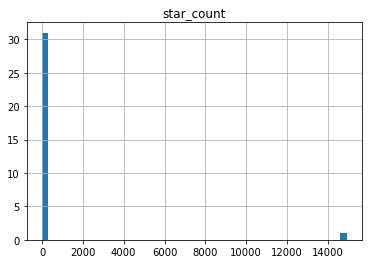

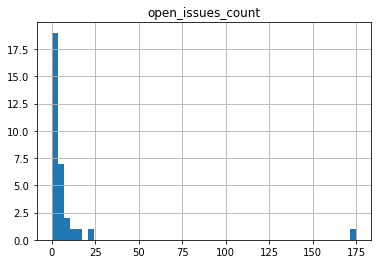

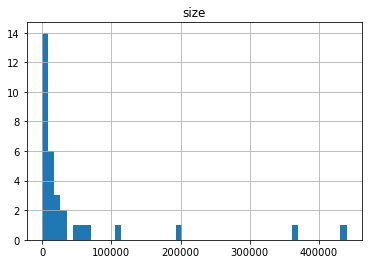

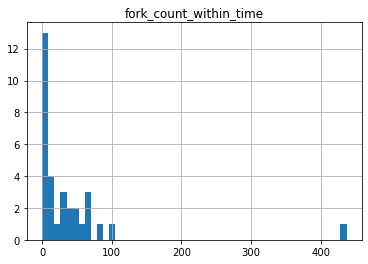

In [7]:
print("(number of retired projects, number of projects features): " + str(rtProFeatDF.shape) )
print("Histograms for retired projects on projects features: \n")

for feat in proFeat:
    rtProFeatDF.hist(column=feat, bins=50)


In [8]:
rtProForksFeatDF = pd.DataFrame.from_dict(rtProForksFeat, orient='index')
grProForksFeatDF = pd.DataFrame.from_dict(grProForksFeat, orient='index')

print("(number of retired projects's forks in the incubation period, number of forks features): " 
      + str(rtProForksFeatDF.shape) )
print("Statistics for retired projects' forks in the incubation period with forks features: \n")

print(rtProForksFeatDF.describe())


(number of retired projects's forks in the incubation period, number of forks features): (29, 8)
Statistics for retired projects' forks in the incubation period with forks features: 

       watchers_count  star_count  branches_count  total_commits_count  \
count       29.000000   29.000000       29.000000            29.000000   
mean        45.413793   45.413793      871.793103         48282.172414   
std         71.304937   71.304937     2945.279497        142671.650784   
min          0.000000    0.000000        0.000000             0.000000   
25%          5.000000    5.000000       11.000000           343.000000   
50%         17.000000   17.000000      115.000000          7866.000000   
75%         55.000000   55.000000      328.000000         31403.000000   
max        337.000000  337.000000    15787.000000        762137.000000   

       commits_count_within_incubation  total_no_of_times_files_modified  \
count                        29.000000                         29.000000 

In [9]:
print("(number of graduated projects' forks in the incubation period, number of forks features): " 
      + str(grProForksFeatDF.shape) )
print("Statistics for graduated projects' forks in the incubation period with forks features: \n")

print(grProForksFeatDF.describe())


(number of graduated projects' forks in the incubation period, number of forks features): (52, 8)
Statistics for graduated projects' forks in the incubation period with forks features: 

       watchers_count  star_count  branches_count  total_commits_count  \
count       52.000000   52.000000       52.000000         5.200000e+01   
mean        52.153846   52.134615      702.269231         1.053358e+05   
std         73.541074   73.543379     1104.859713         2.502567e+05   
min          0.000000    0.000000        0.000000         0.000000e+00   
25%          5.750000    5.750000       27.000000         2.629500e+03   
50%         25.500000   25.500000      212.500000         1.880900e+04   
75%         73.000000   73.000000      688.750000         1.147692e+05   
max        360.000000  360.000000     4763.000000         1.642089e+06   

       commits_count_within_incubation  total_no_of_times_files_modified  \
count                        52.000000                      5.200000e+

(number of retired projects's forks in the incubation period, number of forks features): (29, 8)
Histograms for retired projects' forks in the incubation period on forks features: 



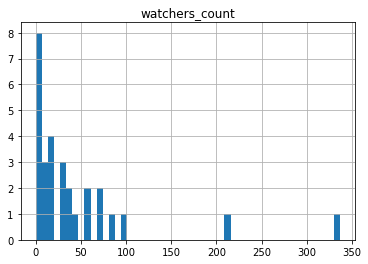

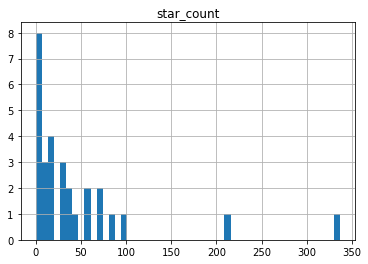

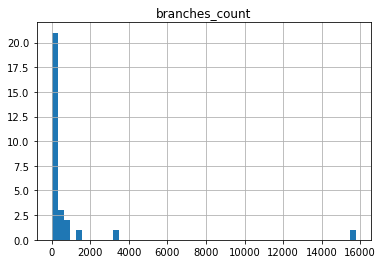

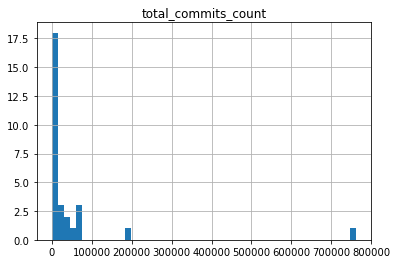

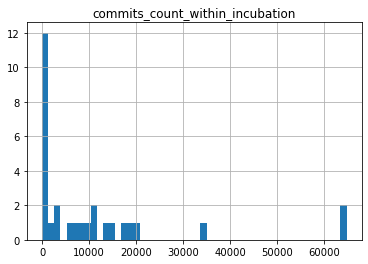

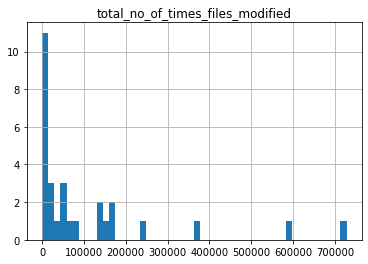

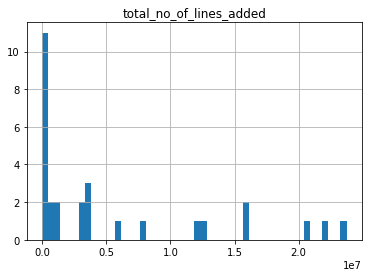

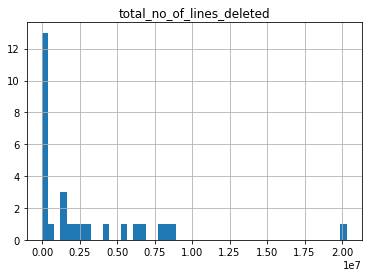

In [10]:
print("(number of retired projects's forks in the incubation period, number of forks features): " 
      + str(rtProForksFeatDF.shape) )
print("Histograms for retired projects' forks in the incubation period on forks features: \n")

for feat in forkFeat:
    rtProForksFeatDF.hist(column=feat, bins=50)


(number of graduated projects's forks in the incubation period, number of forks features): (52, 8)
Histograms for graduated projects' forks in the incubation period on forks features: 



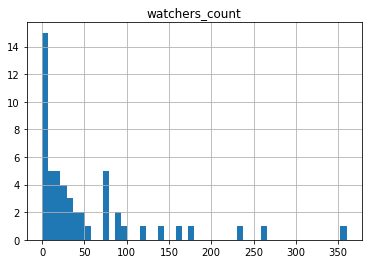

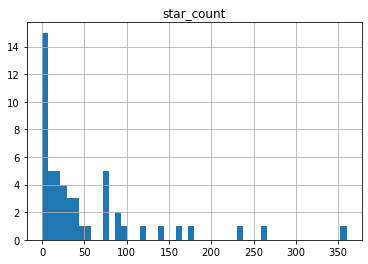

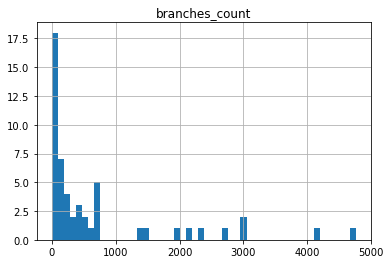

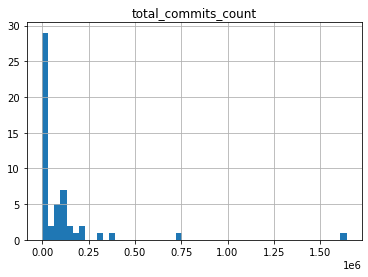

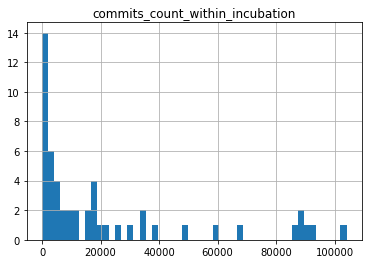

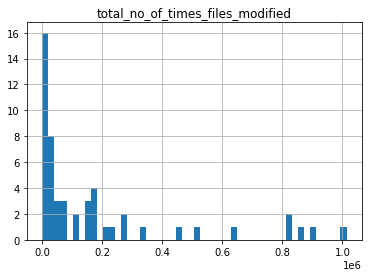

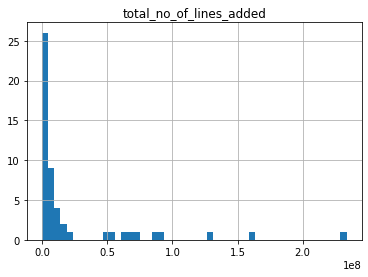

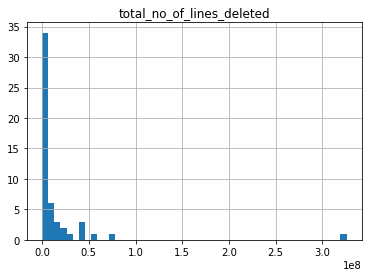

In [11]:
print("(number of graduated projects's forks in the incubation period, number of forks features): " 
      + str(grProForksFeatDF.shape) )
print("Histograms for graduated projects' forks in the incubation period on forks features: \n")

for feat in forkFeat:
    grProForksFeatDF.hist(column=feat, bins=50)


# 2. Regression Models
Project Features:\
    "total_fork_count"\
    "watchers_count"\
    "star_count"\
    "open_issues_count"\
    "size"\
    "fork_count_within_time"

Fork Features:\
    "watchers_count"\
    "star_count"\
    "branches_count"\
    "total_commits_count"\
    "commits_count_within_incubation"\
    "total_no_of_times_files_modified"\
    "total_no_of_lines_added"\
    "total_no_of_lines_deleted"
    

## 2.1 Regression Models on the Project Features

### Aggregrate all data in a data frame

In [12]:
# Create the label variable for retired and graduated
if 'label' not in rtProFeatDF.columns:
    rtProFeatDF.insert(loc=6, column='label', value=np.zeros(rtProFeatDF.shape[0], dtype=int))
if 'label' not in grProFeatDF.columns:
    grProFeatDF.insert(loc=6, column='label', value=np.ones(grProFeatDF.shape[0], dtype=int))

# Create one dataframe for BOTH retired and graduated projects
allProFeatDF = copy.deepcopy(rtProFeatDF)
allProFeatDF = allProFeatDF.append(grProFeatDF)

# Filter the data to remove outliers
lo = allProFeatDF[proFeat].quantile(0.10)
hi = allProFeatDF[proFeat].quantile(0.90)
allProFeatDF_filtered = copy.deepcopy(allProFeatDF)
allProFeatDF_filtered = allProFeatDF_filtered[((allProFeatDF_filtered[proFeat] < hi) & (allProFeatDF_filtered[proFeat] > lo)).any(axis=1)]

# Fix any null data
allProFeatDF_filtered = allProFeatDF_filtered.fillna(method='ffill')

# Normalize the data on size feature
allProFeatDF_filtered['size'] = np.log(allProFeatDF_filtered['size'])

### 2.1.a Multivariable Logistic Regression Model on ALL 6 project features

Precision: 0.9696969696969697
Recall: 0.9142857142857143
Accuracy: 0.9024390243902439
Optimization terminated successfully.
         Current function value: 0.235064
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  121
Model:                          Logit   Df Residuals:                      115
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.5483
Time:                        20:39:22   Log-Likelihood:                -28.443
converged:                       True   LL-Null:                       -62.962
Covariance Type:            nonrobust   LLR p-value:                 1.624e-13
                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

/Users/ll/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


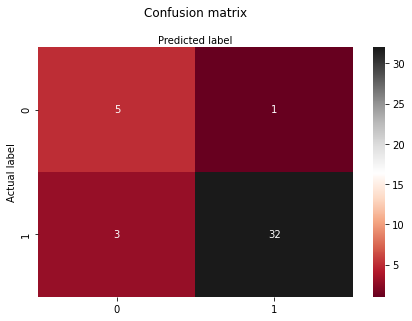

In [13]:
# Split the data to train and test by train:test = 3:1
X = allProFeatDF_filtered[proFeat]
y = allProFeatDF_filtered['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# Train the Logistic Regression Model and generate predicted values
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

# Confusion metrics and its results
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# Precision = TP / (TP + FP)
print("Precision:",metrics.precision_score(y_test, y_pred))
# Recall = TP / (TP + FN)
print("Recall:",metrics.recall_score(y_test, y_pred))
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Graph of confusion matrix
class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Print Logit Regression Results
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
print(result.summary())

Project Features:\
    "total_fork_count"\
    "watchers_count"\
    "star_count"\
    "open_issues_count"\
    "size"\
    "fork_count_within_time"


### 2.1.b Univariable Logistic Regression on EACH of 6 project features

Precision: 0.8536585365853658
Recall: 1.0
Accuracy: 0.8536585365853658
Optimization terminated successfully.
         Current function value: 0.538953
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  121
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                -0.03576
Time:                        20:39:22   Log-Likelihood:                -65.213
converged:                       True   LL-Null:                       -62.962
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0041      0.001     

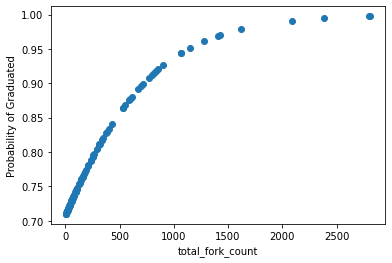

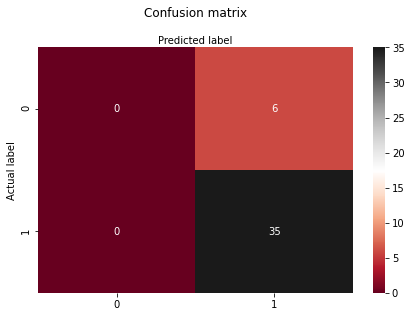

In [14]:
# total_fork_count
hlp.logreg_uniVar('total_fork_count', X_train, y_train, X_test, y_test)

Precision: 0.8536585365853658
Recall: 1.0
Accuracy: 0.8536585365853658
Optimization terminated successfully.
         Current function value: 0.560055
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  121
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                -0.07631
Time:                        20:39:22   Log-Likelihood:                -67.767
converged:                       True   LL-Null:                       -62.962
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0175      0.004     

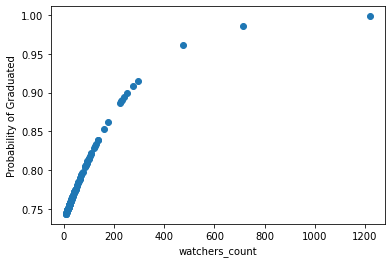

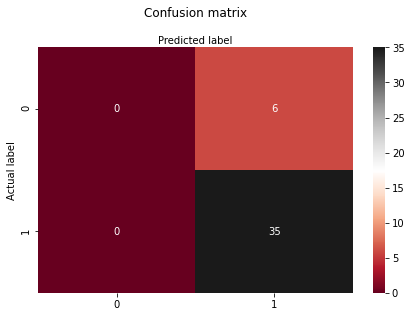

In [15]:
# watchers_count
hlp.logreg_uniVar('watchers_count', X_train, y_train, X_test, y_test)

Precision: 0.8536585365853658
Recall: 1.0
Accuracy: 0.8536585365853658
Optimization terminated successfully.
         Current function value: 0.641766
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  121
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                 -0.2333
Time:                        20:39:23   Log-Likelihood:                -77.654
converged:                       True   LL-Null:                       -62.962
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0007      0.000     

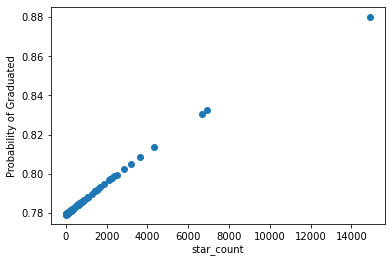

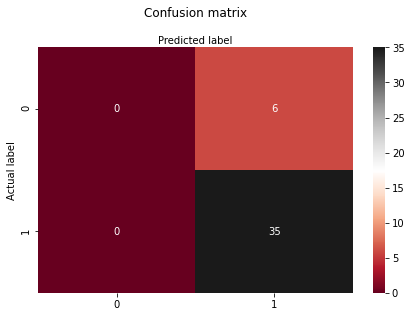

In [16]:
# star_count
hlp.logreg_uniVar('star_count', X_train, y_train, X_test, y_test)

Precision: 0.8536585365853658
Recall: 1.0
Accuracy: 0.8536585365853658
Optimization terminated successfully.
         Current function value: 0.556204
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  121
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                -0.06891
Time:                        20:39:23   Log-Likelihood:                -67.301
converged:                       True   LL-Null:                       -62.962
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0443      0.014     

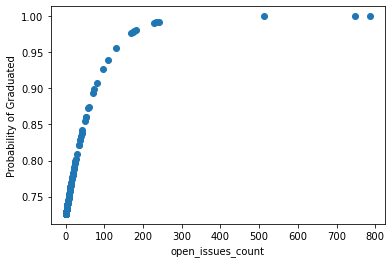

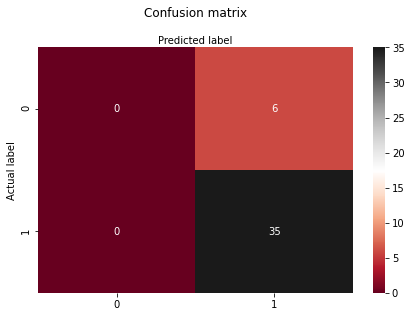

In [17]:
# open_issues_count
hlp.logreg_uniVar('open_issues_count', X_train, y_train, X_test, y_test)

Precision: 0.85
Recall: 0.9714285714285714
Accuracy: 0.8292682926829268
Optimization terminated successfully.
         Current function value: 0.483976
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  121
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                 0.06990
Time:                        20:39:23   Log-Likelihood:                -58.561
converged:                       True   LL-Null:                       -62.962
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1390      0.022    

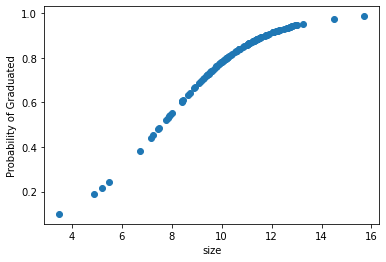

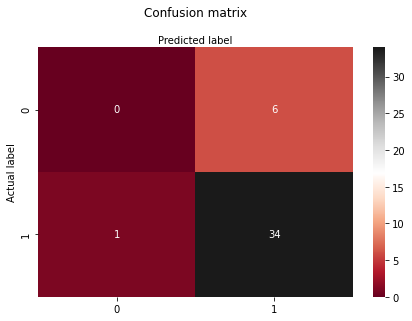

In [18]:
# size
hlp.logreg_uniVar('size', X_train, y_train, X_test, y_test)

Precision: 0.8536585365853658
Recall: 1.0
Accuracy: 0.8536585365853658
Optimization terminated successfully.
         Current function value: 0.688564
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  121
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                 -0.3233
Time:                        20:39:24   Log-Likelihood:                -83.316
converged:                       True   LL-Null:                       -62.962
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0033      0.003     

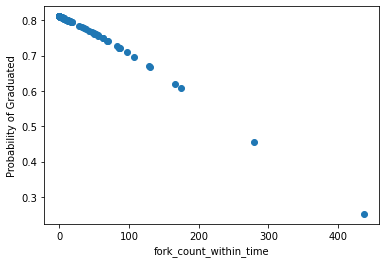

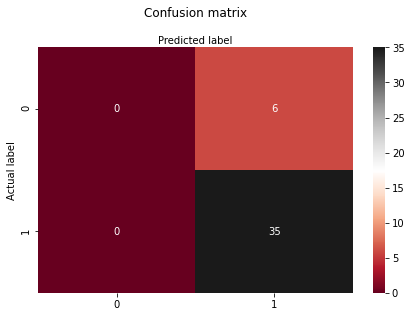

In [19]:
# fork_count_within_time
hlp.logreg_uniVar('fork_count_within_time', X_train, y_train, X_test, y_test)

## 2.2 Logistic Regression Models on the Fork Features

### Aggregate all data in a data frame

In [20]:
# Create the label variable for retired and graduated
if 'label' not in rtProForksFeatDF.columns:
    rtProForksFeatDF.insert(loc=8, column='label', value=np.zeros(rtProForksFeatDF.shape[0], dtype=int))
if 'label' not in grProForksFeatDF.columns:
    grProForksFeatDF.insert(loc=8, column='label', value=np.ones(grProForksFeatDF.shape[0], dtype=int))

# Create one dataframe for BOTH retired and graduated projects
allProForksFeatDF = copy.deepcopy(rtProForksFeatDF)
allProForksFeatDF = allProForksFeatDF.append(grProForksFeatDF)

# Filter the data to remove outliers
lo = allProForksFeatDF[forkFeat].quantile(0.10)
hi = allProForksFeatDF[forkFeat].quantile(0.90)
allProForksFeatDF_filtered = copy.deepcopy(allProForksFeatDF)
allProForksFeatDF_filtered = allProForksFeatDF_filtered[((allProForksFeatDF_filtered[forkFeat] < hi) & (allProForksFeatDF_filtered[forkFeat] > lo)).any(axis=1)]

# Fix any null data
allProForksFeatDF_filtered = allProForksFeatDF_filtered.fillna(method='ffill')
#print(allProForksFeatDF.columns.isnull())


allProForksFeatDF_filtered[forkFeat[3:8]] = np.log2(allProForksFeatDF_filtered[forkFeat[3:8]])
allProForksFeatDF_filtered[np.isneginf(allProForksFeatDF_filtered)] = 0

    
#print(allProForksFeatDF)

### 2.2.a Multivariable Logistic Regression Model on ALL 8 fork features and the new created code_churn

Precision: 0.8666666666666667
Recall: 0.8666666666666667
Accuracy: 0.7894736842105263
Optimization terminated successfully.
         Current function value: 0.651576
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Hessian evaluations: 4
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                   57
Model:                          Logit   Df Residuals:                       49
Method:                           MLE   Df Model:                            7
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                 0.04269
Time:                        20:39:24   Log-Likelihood:                -37.140
converged:                       True   LL-Null:                       -38.796
Covariance Type:            nonrobust   LLR p-value:                    0.8547
                                       coef    std err          z      P>|z|     

/Users/ll/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


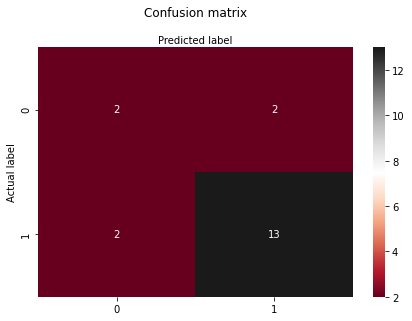

In [21]:
# Split the data to train and test by train:test = 3:1
X = allProForksFeatDF_filtered[forkFeat]
y = allProForksFeatDF_filtered['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# Train the Logistic Regression Model and generate predicted values
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

# Confusion metrics and its results
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# Precision = TP / (TP + FP)
print("Precision:",metrics.precision_score(y_test, y_pred))
# Recall = TP / (TP + FN)
print("Recall:",metrics.recall_score(y_test, y_pred))
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Graph of confusion matrix
class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Print Logit Regression Results
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit(method='ncg')
print(result.summary())

### 2.2.b Univariable Logistic Regression on EACH of 6 fork features

Fork Features:\
    "watchers_count"\
    "star_count"\
    "branches_count"\
    "total_commits_count"\
    "commits_count_within_incubation"\
    "total_no_of_times_files_modified"\
    "total_no_of_lines_added"\
    "total_no_of_lines_deleted"

Precision: 0.7894736842105263
Recall: 1.0
Accuracy: 0.7894736842105263
Optimization terminated successfully.
         Current function value: 0.680706
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   57
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:              -0.0001126
Time:                        20:39:24   Log-Likelihood:                -38.800
converged:                       True   LL-Null:                       -38.796
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0043      0.004     

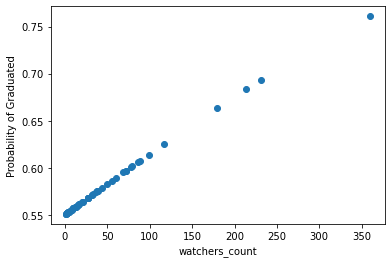

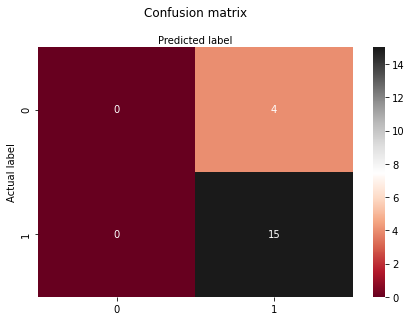

In [22]:
# watchers_count
hlp.logreg_uniVar('watchers_count', X_train, y_train, X_test, y_test)

Precision: 0.7894736842105263
Recall: 1.0
Accuracy: 0.7894736842105263
Optimization terminated successfully.
         Current function value: 0.680740
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   57
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:              -0.0001627
Time:                        20:39:25   Log-Likelihood:                -38.802
converged:                       True   LL-Null:                       -38.796
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0043      0.004     

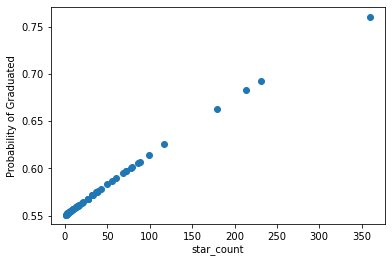

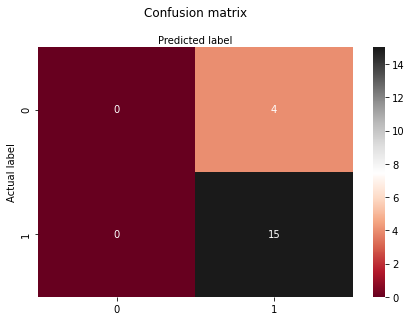

In [23]:
# star_count
hlp.logreg_uniVar('star_count', X_train, y_train, X_test, y_test)

Precision: 0.7894736842105263
Recall: 1.0
Accuracy: 0.7894736842105263
Optimization terminated successfully.
         Current function value: 0.653964
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   57
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                 0.03918
Time:                        20:39:25   Log-Likelihood:                -37.276
converged:                       True   LL-Null:                       -38.796
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0008      0.000     

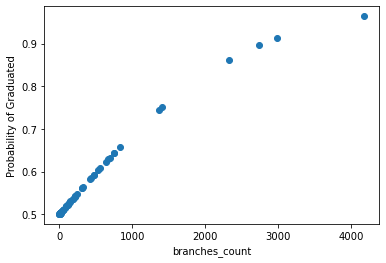

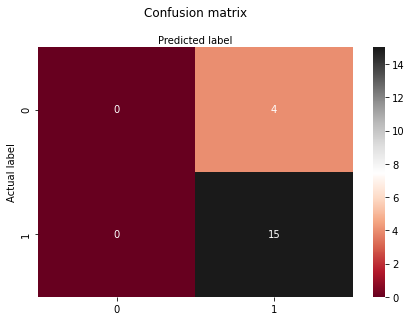

In [24]:
# branches_count
hlp.logreg_uniVar('branches_count', X_train, y_train, X_test, y_test)

Precision: 0.8823529411764706
Recall: 1.0
Accuracy: 0.8947368421052632
Optimization terminated successfully.
         Current function value: 0.671373
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   57
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                 0.01360
Time:                        20:39:25   Log-Likelihood:                -38.268
converged:                       True   LL-Null:                       -38.796
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0312      0.020     

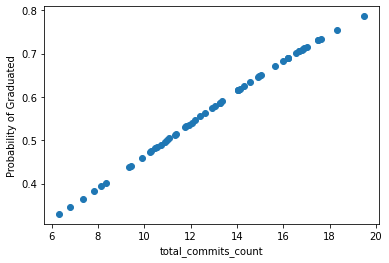

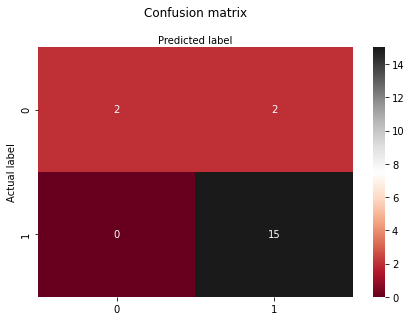

In [25]:
# total_commits_count
hlp.logreg_uniVar('total_commits_count', X_train, y_train, X_test, y_test)

Precision: 0.8823529411764706
Recall: 1.0
Accuracy: 0.8947368421052632
Optimization terminated successfully.
         Current function value: 0.672160
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   57
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                 0.01244
Time:                        20:39:26   Log-Likelihood:                -38.313
converged:                       True   LL-Null:                       -38.796
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0335      0.022     

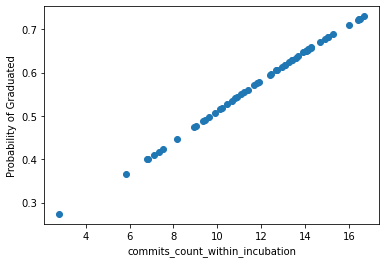

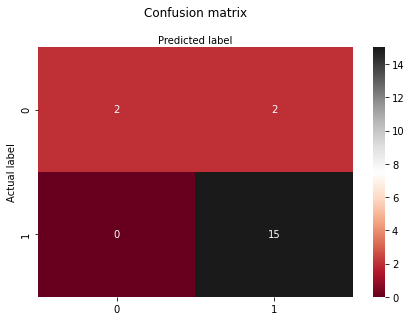

In [26]:
# commits_count_within_incubation
hlp.logreg_uniVar('commits_count_within_incubation', X_train, y_train, X_test, y_test)

Precision: 0.7894736842105263
Recall: 1.0
Accuracy: 0.7894736842105263
Optimization terminated successfully.
         Current function value: 0.680669
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   57
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:              -5.866e-05
Time:                        20:39:26   Log-Likelihood:                -38.798
converged:                       True   LL-Null:                       -38.796
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0210      0.018     

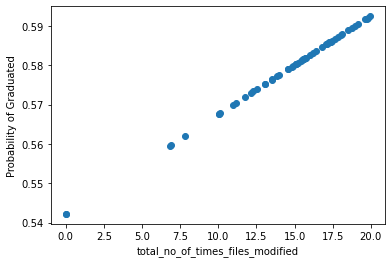

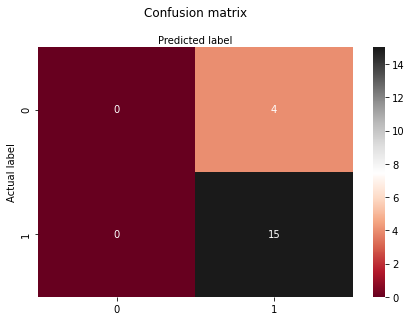

In [27]:
# total_no_of_times_files_modified
hlp.logreg_uniVar('total_no_of_times_files_modified', X_train, y_train, X_test, y_test)

Precision: 0.8823529411764706
Recall: 1.0
Accuracy: 0.8947368421052632
Optimization terminated successfully.
         Current function value: 0.673951
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   57
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                0.009812
Time:                        20:39:26   Log-Likelihood:                -38.415
converged:                       True   LL-Null:                       -38.796
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0187      0.013     

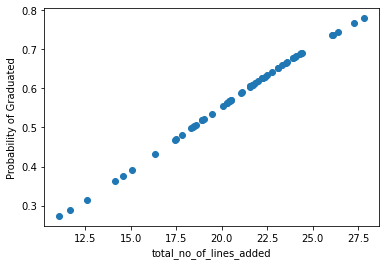

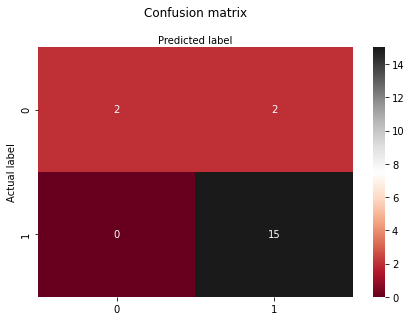

In [28]:
# total_no_of_lines_added
hlp.logreg_uniVar('total_no_of_lines_added', X_train, y_train, X_test, y_test)

Precision: 0.8823529411764706
Recall: 1.0
Accuracy: 0.8947368421052632
Optimization terminated successfully.
         Current function value: 0.672977
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   57
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                 0.01124
Time:                        20:39:27   Log-Likelihood:                -38.360
converged:                       True   LL-Null:                       -38.796
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0203      0.014     

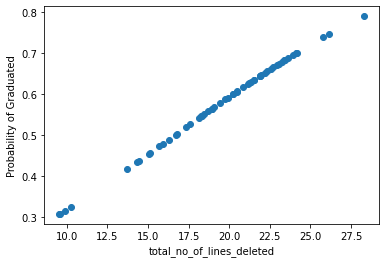

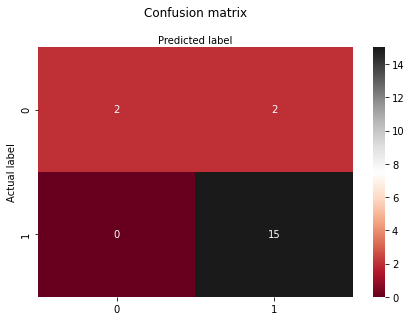

In [29]:
# total_no_of_lines_deleted
hlp.logreg_uniVar('total_no_of_lines_deleted', X_train, y_train, X_test, y_test)

# 3. Improved Regression Model

## (a) New feature code_churn

In [30]:
# Define New Fork Feature code_churn = total_no_of_lines_added + total_no_of_lines_deleted
forkFeat.append('code_churn')
if 'code_churn' not in allProForksFeatDF_filtered.columns:
    allProForksFeatDF_filtered['code_churn'] = allProForksFeatDF_filtered["total_no_of_lines_added"] + allProForksFeatDF_filtered["total_no_of_lines_deleted"]

# Split the data to train and test by train:test = 3:1
X = allProForksFeatDF_filtered[forkFeat]
y = allProForksFeatDF_filtered['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Normalization by using log function on code_churn
allProForksFeatDF_filtered['code_churn'] = np.log2(allProForksFeatDF_filtered['code_churn'])
allProForksFeatDF_filtered[np.isneginf(allProForksFeatDF_filtered)] = 0

Precision: 0.8823529411764706
Recall: 1.0
Accuracy: 0.8947368421052632
Optimization terminated successfully.
         Current function value: 0.673462
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   57
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                 0.01053
Time:                        20:39:27   Log-Likelihood:                -38.387
converged:                       True   LL-Null:                       -38.796
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0098      0.007     

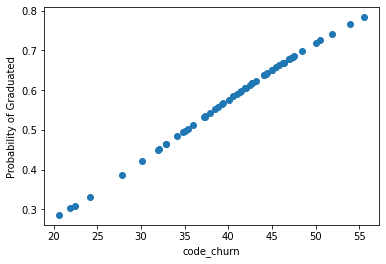

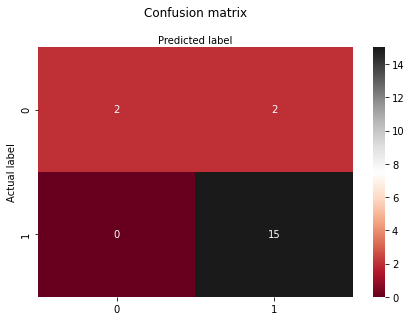

In [31]:
# code_churn
hlp.logreg_uniVar('code_churn', X_train, y_train, X_test, y_test)